**<font size="5">Applied Statistics</font>**

<font size="3">MSc in High Performance Computing Engineering, Computer Science and Engineering, Physics Engineering - A.Y. 2024-2025</font>

Prof. Mario Beraha - Dott. Vittorio Torri

---

<font size="4">**Lab 6 - Linear Regression**</font>

# Libraries

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
import statsmodels.api as sm

In [ ]:
np.random.seed(1234)

In [ ]:
import scipy.stats as stats

# Load Dataset

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bmi
0,75.00,0,582,0,20.73,1,265000.00,1.90,138.39,Male,0,4,True,30.82
1,55.00,0,7861,0,29.02,0,263358.03,1.10,131.90,Male,0,6,True,25.40
2,65.00,0,146,0,26.24,0,162000.00,1.30,143.66,Male,1,7,True,29.45
3,50.00,1,111,0,10.21,0,210000.00,1.90,135.03,Male,0,7,True,36.06
4,65.00,1,160,1,19.33,0,327000.00,2.70,136.08,Female,0,8,True,33.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38.05,1,155000.00,1.10,135.58,Male,1,270,False,25.60
295,55.00,0,1820,0,35.20,0,270000.00,1.20,142.02,Female,0,271,False,29.39
296,45.00,0,2060,1,62.32,0,742000.00,0.80,136.38,Female,0,278,False,20.71
297,45.00,0,2413,0,37.49,0,140000.00,1.40,133.91,Male,1,280,False,27.76


In [ ]:
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']

# Simple Linear Regression

Let's look at the scatterplot of bmi and ejection fraction

In [ ]:
TARGET = 'bmi'

<ipython-input-93-35483e4baa6d>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="ejection_fraction", y="bmi", palette="muted",


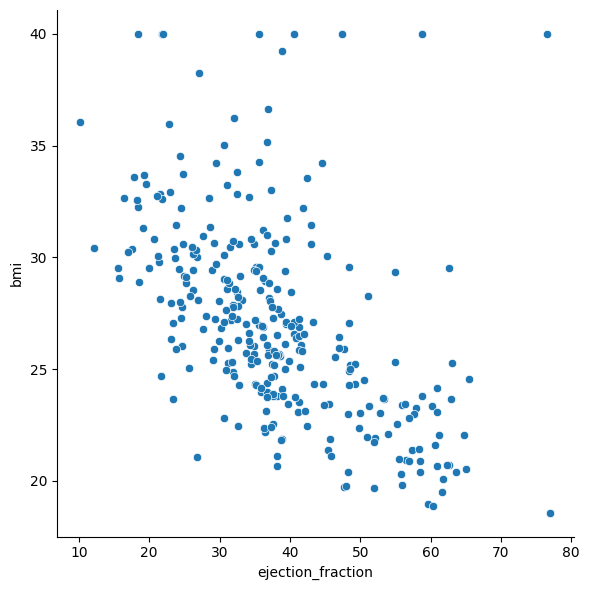

In [ ]:
sns.relplot(x="ejection_fraction", y="bmi", palette="muted",
            height=6, data=df)

It looks like there is a relationship between them: we can try to predict BMI based on ejection fraction

In [ ]:
X = df['ejection_fraction'].values.reshape(-1,1)
y = df['bmi']

In [ ]:
X_const = sm.add_constant(X) #to spot Beta_0

In [ ]:
X_const

array([[ 1.        , 20.72719503],
       [ 1.        , 29.0182135 ],
       [ 1.        , 26.24384702],
       [ 1.        , 10.20774141],
       [ 1.        , 19.33171494],
       [ 1.        , 35.60830264],
       [ 1.        , 20.00570868],
       [ 1.        , 64.74522091],
       [ 1.        , 63.64964487],
       [ 1.        , 35.62711417],
       [ 1.        , 36.91730026],
       [ 1.        , 24.64373731],
       [ 1.        , 31.09298612],
       [ 1.        , 36.49764547],
       [ 1.        , 35.88275379],
       [ 1.        , 49.97883583],
       [ 1.        , 35.14953344],
       [ 1.        , 15.73624933],
       [ 1.        , 24.17359747],
       [ 1.        , 54.93096893],
       [ 1.        , 24.49318143],
       [ 1.        , 30.65974616],
       [ 1.        , 34.88618134],
       [ 1.        , 59.67835102],
       [ 1.        , 31.13162223],
       [ 1.        , 45.31321666],
       [ 1.        , 36.1256288 ],
       [ 1.        , 52.74429614],
       [ 1.        ,

$$ bmi = \beta_0 + \beta_1 \cdot ef + \epsilon $$

In [ ]:
model = sm.OLS(y, X_const)
results = model.fit()
print(results.summary())

#Bo_hat , B1_hat (OLS) = (34.5154, -0.1944)
# P>|t| --> if the value is  LESS < 5% (0.05) for a variable, then that variable is very useful for the model; otherwise, we can remove that variable from the model + confidence interval for the parameter Beta_j of level (1-alfa) = ( , )

#F-statistic:                     117.2
#Prob (F-statistic):           3.06e-23 => Test to state wheter all the betas are 0, in this case since the pvalue is really low we REJECT H0 = (Betas=0)

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sun, 11 May 2025   Prob (F-statistic):           3.06e-23
Time:                        13:37:19   Log-Likelihood:                -821.26
No. Observations:                 299   AIC:                             1647.
Df Residuals:                     297   BIC:                             1654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5154      0.717     48.117      0.0

In [ ]:
y_pred = results.predict(X_const) # predictions over the training set: (y_pred == fitted)

r2 = r2_score(y,y_pred)
mse = mean_squared_error(y,y_pred)

print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.2829
MSE: 14.2321


<ipython-input-99-73e6e3a13a01>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="ejection_fraction", y="bmi", palette="muted",


<Axes: xlabel='ejection_fraction', ylabel='bmi'>

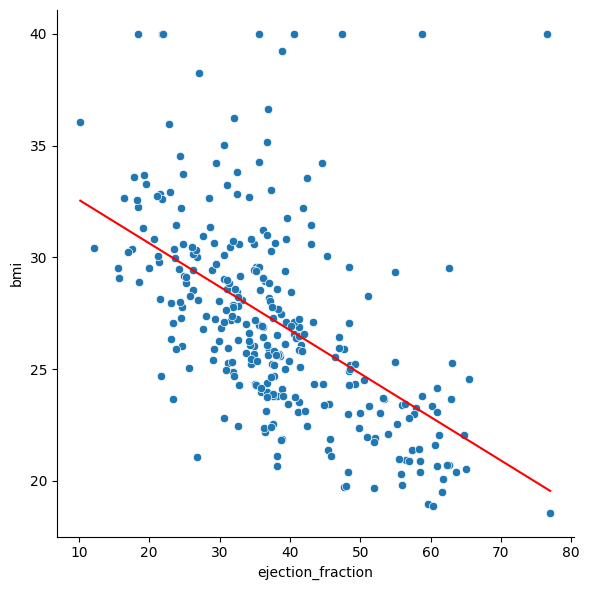

In [ ]:
X_plot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
X_plot = sm.add_constant(X_plot)
y_plot = results.predict(X_plot)
sns.relplot(x="ejection_fraction", y="bmi", palette="muted",
            height=6, data=df)
sns.lineplot(x=X_plot[:,1],y=y_plot,color='red')

## Confidence/Prediction intervals

Confidence Interval: with prob (1-alpha) to have an interval s.t the theoretical AVERAGE result of the prediction y* related to  x*

Prediction Interval: i want the interval for the single obs y* related to x* (so we have additional uncertanty related to the error epsilon). (LARGER INTERVAL, since a signle obs has more variability w.r.t the average of all obs)

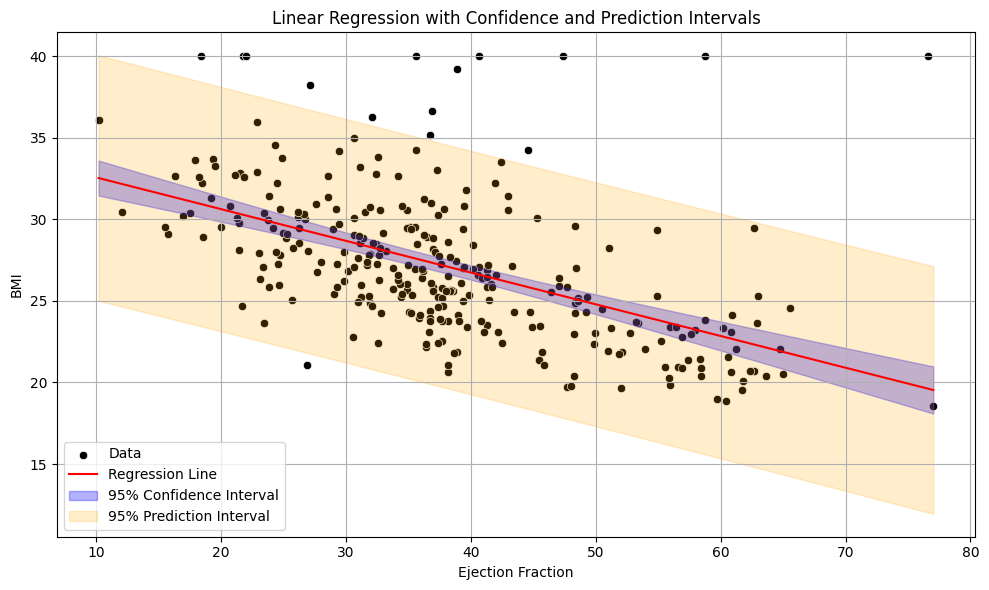

In [ ]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_const = sm.add_constant(X_plot)

# Predict with confidence intervals
predictions = results.get_prediction(X_plot_const)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% confidence intervals

# Extract the values
y_pred = summary_frame['mean']

# confidence_interval
ci_lower = summary_frame['mean_ci_lower']
ci_upper = summary_frame['mean_ci_upper']

# predictions_interval
pi_lower = summary_frame['obs_ci_lower']
pi_upper = summary_frame['obs_ci_upper']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ejection_fraction'], y=df['bmi'], label='Data', color='black')
plt.plot(X_plot, y_pred, color='red', label='Regression Line')
plt.fill_between(X_plot.flatten(), ci_lower, ci_upper, color='blue', alpha=0.3, label='95% Confidence Interval')
plt.fill_between(X_plot.flatten(), pi_lower, pi_upper, color='orange', alpha=0.2, label='95% Prediction Interval')
plt.xlabel('Ejection Fraction')
plt.ylabel('BMI')
plt.title('Linear Regression with Confidence and Prediction Intervals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
x_mean = X.mean()
idx_closest = np.argmin(np.abs(X_plot.flatten() - x_mean))

ci_width_at_mean = ci_upper.iloc[idx_closest] - ci_lower.iloc[idx_closest]
pi_width_at_mean = pi_upper.iloc[idx_closest] - pi_lower.iloc[idx_closest]

print(f'CI width at mean(X) = {x_mean:.2f}: {ci_width_at_mean:.4f}')
print(f'PI width at mean(X) = {x_mean:.2f}: {pi_width_at_mean:.4f}')

print("CI width (start/end):", ci_upper.iloc[0] - ci_lower.iloc[0], ci_upper.iloc[-1] - ci_lower.iloc[-1])
print("PI width (start/end):", pi_upper.iloc[0] - pi_lower.iloc[0], pi_upper.iloc[-1] - pi_lower.iloc[-1])

CI width at mean(X) = 38.03: 0.8617
PI width at mean(X) = 38.03: 14.9234
CI width (start/end): 2.147469878187124 2.88785205970143
PI width (start/end): 15.05250862305327 15.17583864200242


Prediction and confidence intervals for a pecific point, ef=45

In [ ]:
x_ef_const = np.array([1,45])

y_pred = results.predict(x_ef_const)
mean_ci_lower = results.get_prediction(x_ef_const).summary_frame()['mean_ci_lower']
mean_ci_upper = results.get_prediction(x_ef_const).summary_frame()['mean_ci_upper']

ci_lower = results.get_prediction(x_ef_const).summary_frame()['obs_ci_lower']
ci_upper = results.get_prediction(x_ef_const).summary_frame()['obs_ci_upper']

print(f'Prediction: {y_pred[0]:.4f}')
print(f'Mean CI lower: {mean_ci_lower[0]:.4f}')
print(f'Mean CI upper: {mean_ci_upper[0]:.4f}')
print(f'OBS CI lower: {ci_lower[0]:.4f}')
print(f'OBS CI upper: {ci_upper[0]:.4f}')

Prediction: 25.7654
Mean CI lower: 25.2692
Mean CI upper: 26.2617
OBS CI lower: 18.2997
OBS CI upper: 33.2312


## Train-test set

So far we are evaluating the model on the same data it was trained on..

In [1]:
from sklearn import model_selection

X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'ejection_fraction', 'time']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=1234)

train_index = X_train.index
test_index = X_test.index

NameError: name 'df' is not defined

In [ ]:
len(X_train)

239

In [ ]:
len(X_test)

60

In [ ]:
### FIT THE MODEL ON TRAINING DATA
X_train_1= X_train['ejection_fraction']
X_test_1= X_test['ejection_fraction']
X_train_1 = sm.add_constant(X_train_1)
X_test_1 = sm.add_constant(X_test_1)

model_train = sm.OLS(y_train, X_train_1)
results = model_train.fit()
print(results.summary())

y_train_pred = results.predict(X_train_1) #fitted values
r2 = r2_score(y_train,y_train_pred)

print(f'R2: {r2:.4f}')

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     91.11
Date:                Sun, 11 May 2025   Prob (F-statistic):           1.76e-18
Time:                        13:37:20   Log-Likelihood:                -664.47
No. Observations:                 239   AIC:                             1333.
Df Residuals:                     237   BIC:                             1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                34.7489      0.82

In [ ]:
### COMPUTE MSE AND R^2 ON TEST DATA
y_pred = results.predict(X_test_1)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.2995
MSE: 10.3824


# Multiple linear regression

## Multiple input variables

$$ bmi = \beta_0 + \beta_1 \cdot age + \beta_2 \cdot \text{ creatinine_phosphokinase } + ... + \epsilon $$

In [ ]:
variables = num_vars.copy()
variables.remove('bmi')

X_train_2 = X_train[variables]
X_test_2 = X_test[variables]
X_train_2 = sm.add_constant(X_train_2)
X_test_2 = sm.add_constant(X_test_2)

In [ ]:
model = sm.OLS(y_train, X_train_2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sun, 11 May 2025   Prob (F-statistic):           5.01e-73
Time:                        13:37:20   Log-Likelihood:                -520.64
No. Observations:                 239   AIC:                             1057.
Df Residuals:                     231   BIC:                             1085.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
y_pred = results.predict(X_test_2)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_2.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6238
adj_R2: 0.5648
MSE: 5.5757


$$ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum{(y_i - \hat{y_i})^2}}{\sum{(y_i - \bar{y})^2}}$$

$$ AdjR^2 = 1 - \frac{n - 1}{n - k -1} \frac{RSS}{TSS}$$

where $k$ is the number of regressors

## Collinearity

The Variance Inflation Factor (VIF) indicates how good a variable can be predicted from the others

A high VIF means there is collinearity with some other variable

Rule of thumb: VIF > 5 for a variable is problematic

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = X_train_2

vif_data = pd.DataFrame()
vif_data["Variable"] = data.columns

vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

                   Variable     VIF
0                     const 1158.00
1                       age    1.12
2  creatinine_phosphokinase    1.02
3         ejection_fraction    1.04
4                 platelets    1.02
5          serum_creatinine    1.07
6              serum_sodium    1.07
7                      time    1.07


The correlation coefficients can also identify collinearity, but not always. If a variable X1 is a linear transformation of a variable X2, their linear correlation coefficient will be high. But if the collinearity involves a group of variable, then it might not be evident from the correlation matrix

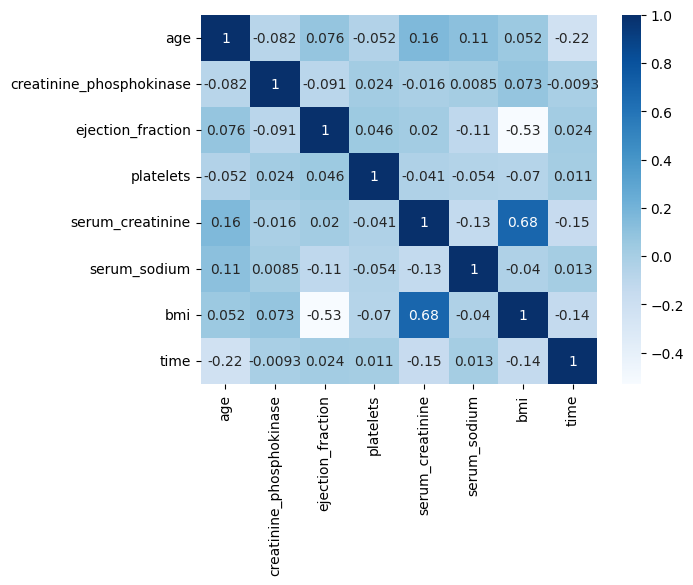

In [ ]:
sns.heatmap(df[num_vars].corr(), cmap="Blues",annot=True);

COMMENTO:
Il VIF è una misura di correlazione che coinvolge piu di una variabile percio è molto piu esaustiva della matrice di correlazione di pearson che misura la correlazione lineare di una COPPIA di variabili.
VIF puo catturare una situazione del genere A = 3B + 4C + 7D -4F quindi è molto piu esaustiva.
con VIF > 5 una variabile è considerata collineare con altre.

## Scale variables



Numerical variables having different scales are often problematic. Many models have their coefficients' computation affected by this, but while this is not the case of linear regression with least square method, it is still useful to standardize the features for interpretability of coefficients and to reduce the condition numer when it is not due to a direct multicollinearity among the variables. The VIF is scale invariant, but the condition number is not.

Moreover, this is necessary when penalizations are introduced in linear regression models (more on this in the next lectures)

To standardize a variable x:

z=x−μσ



In [ ]:
X_train_2 = X_train[variables]
X_test_2 = X_test[variables]

scaler = StandardScaler()
X_train_2_scaled = pd.DataFrame(scaler.fit_transform(X_train_2), columns=X_train_2.columns, index=X_train_2.index)
X_test_2_scaled = pd.DataFrame(scaler.transform(X_test_2), columns=X_test_2.columns, index=X_test_2.index) #trasformo usando media e std del training set

X_train_2_scaled = sm.add_constant(X_train_2_scaled)
X_test_2_scaled = sm.add_constant(X_test_2_scaled)


In [ ]:
model = sm.OLS(y_train, X_train_2_scaled)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sun, 11 May 2025   Prob (F-statistic):           5.01e-73
Time:                        13:37:22   Log-Likelihood:                -520.64
No. Observations:                 239   AIC:                             1057.
Df Residuals:                     231   BIC:                             1085.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Nel machine learning, l'uso di fit_transform e transform dipende dal fatto che durante il processo di addestramento del modello, il trasformatore (come ad esempio uno scaler) impara i parametri statistici dai dati di addestramento (X_train) utilizzando il metodo fit. Questi parametri possono includere la media e la deviazione standard per uno scaler, o altri parametri rilevanti per altri trasformatori.

Una volta che il trasformatore è stato addestrato sui dati di addestramento usando fit, può essere utilizzato per trasformare sia i dati di addestramento che i dati di test. Tuttavia, è importante che quando si trasformano i dati di test, si utilizza il metodo transform anziché fit_transform. Questo perché fit_transform è stato già applicato ai dati di addestramento per adattare il trasformatore, mentre i dati di test devono essere trasformati utilizzando gli stessi parametri appresi dai dati di addestramento.

Quindi, nel tuo esempio:

    scaler.fit_transform(X_train_2) viene utilizzato sui dati di addestramento (X_train_2) per calcolare i parametri di trasformazione e trasformare i dati contemporaneamente.

    scaler.transform(X_test_2) viene utilizzato sui dati di test (X_test_2) per applicare la trasformazione utilizzando i parametri appresi dai dati di addestramento senza riaddestrare il trasformatore.

Questo approccio assicura che i dati di test siano trasformati nello stesso modo dei dati di addestramento, mantenendo la coerenza nel processo di preparazione dei dati e evitando il rischio di introduzione di bias nell'analisi dei risultati del modello.

In [ ]:
y_pred = results.predict(X_test_2_scaled)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_2_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6238
adj_R2: 0.5648
MSE: 5.5757
